### Nearest Neighbour for Classification

In [20]:
from sklearn.datasets import make_blobs, make_regression

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
X,Y = make_blobs(n_features=2, n_samples=50, cluster_std=5, centers=2)

In [24]:
X[:5]

array([[ 3.88868799,  6.41970941],
       [ 2.69168435,  3.20899714],
       [ 9.36253777, -2.95489212],
       [13.25095947, -3.32504452],
       [ 2.96736729,  9.15370313]])

In [26]:
Y[:5]

array([0, 1, 0, 0, 1])

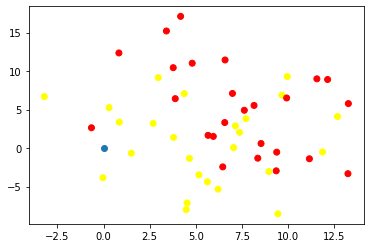

In [31]:
plt.scatter(x=X[:,0], y=X[:,1] , c=Y , cmap='autumn')
plt.scatter(x=[0],y=[0])

In [32]:
Y[:5]

array([0, 1, 0, 0, 1])

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knc = KNeighborsClassifier( n_neighbors=5)

In [38]:
knc.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
knc.predict([[0,0]])

array([1])

In [43]:
knc.kneighbors([[0,0]])

(array([[1.64808816, 2.71877707, 3.47398527, 3.85048839, 4.04156735]]),
 array([[11, 20,  9, 31, 10]], dtype=int64))

In [46]:
neighbours = X[[11, 20,  9, 31, 10]]

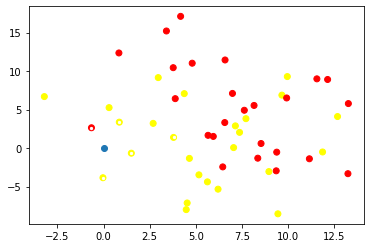

In [48]:
plt.scatter(x=X[:,0], y=X[:,1], c=Y, cmap='autumn')
plt.scatter(x=[0], y=[0])
plt.scatter(neighbours[:,0], neighbours[:,1], s=5, c='w')

### Nearest Neighbour For regression

In [49]:
X, Y = make_regression(n_features=2, n_samples=20)

In [51]:
X[:5]

array([[-1.49128087,  0.810184  ],
       [-0.12270026, -0.33511099],
       [-0.3107847 ,  0.29068977],
       [ 1.27707501, -0.67960921],
       [-0.4231659 , -0.1754729 ]])

In [53]:
Y[:5]

array([-22.24700439, -26.12707583,   2.73220675,  19.91025174,
       -30.82708645])

In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
knr = KNeighborsRegressor(n_neighbors=5)

In [56]:
knr.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [58]:
knr.kneighbors([[0,0]])

(array([[0.35686794, 0.42554397, 0.45810491, 0.49741012, 0.82020677]]),
 array([[ 1,  2,  4, 14, 16]], dtype=int64))

In [61]:
neighbours = X[[ 1,  2,  4, 14, 16]]

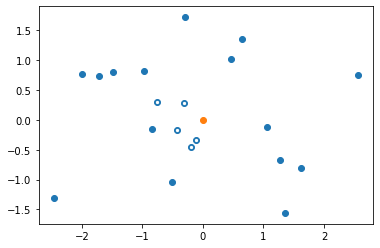

In [64]:
plt.scatter(x=X[:,0], y=X[:,1], cmap='autumn')
plt.scatter(x=[0],y=[0])
plt.scatter(neighbours[:,0],neighbours[:,1],s=5,c='w')

<hr >

In [66]:
import numpy as np

In [67]:
np.mean(Y[[1,  2,  4, 14, 16]])

-21.7753192014255

In [68]:
knr.predict([[0,0]])

array([-21.7753192])

In [69]:
Y[[1,  2,  4, 14, 16]]

array([-26.12707583,   2.73220675, -30.82708645, -36.93024966,
       -17.72439082])

### Why Data Preprocessing
* Data is never in a state such that ML algo works best.
* Text don't work on ML. Those have to be converted into number
* Numbers need to be scaled for better performance

In [71]:
import pandas as pd

In [72]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [73]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [74]:
house_data[['Sqft','Bedroom','Price']][:5]

,Sqft,Bedroom,Price
1,1177.698,2,62000
2,2134.800,4,78000
3,1138.560,2,58000
4,1458.780,3,45000
5,967.776,3,45000


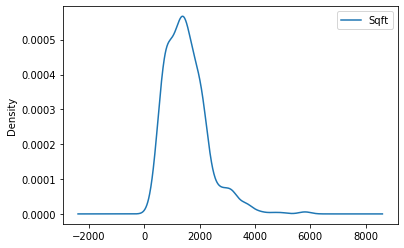

In [76]:
house_data[['Sqft']].plot.kde()

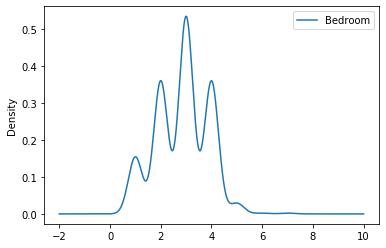

In [79]:
house_data[['Bedroom']].plot.kde()

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
mm = MinMaxScaler()

In [84]:
feature = house_data.drop(columns=['Price'])
target = house_data.Price

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
trainX , testX , trainY , testY = train_test_split(feature, target)

In [96]:
mm.fit(trainX)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [97]:
mm.data_min_

array([370.032,   1.   ,   1.   ,   1.   ,   0.   ,   0.   ])

In [98]:
mm.data_max_

array([5.760402e+03, 2.200000e+01, 3.800000e+01, 7.000000e+00,
       4.000000e+00, 5.000000e+00])

In [99]:
mm.data_range_

array([5.39037e+03, 2.10000e+01, 3.70000e+01, 6.00000e+00, 4.00000e+00,
       5.00000e+00])

In [100]:
trainX_tf = mm.transform(trainX)

In [102]:
testX_tf = mm.transform(testX)

In [101]:
knr.fit(trainX_tf, trainY)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [105]:
predictions = knr.predict(testX)

In [106]:
pd.DataFrame({'Actual':testY, 'Prediction':predictions})[:5]

,Actual,Prediction
250,48800,187000.0
425,45000,187000.0
340,56000,187000.0
446,78000,187000.0
608,50000,187000.0


In [107]:
knr.score(testX_tf,testY)

0.739599037408424

In [109]:
for k in range(2,5):
    print ('k = ',k)
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(trainX_tf,trainY)
    print('Train Acc',knr.score(trainX_tf,trainY))
    print('Test Acc',knr.score(testX_tf,testY))

k =  2
Train Acc 0.8922475734813979
Test Acc 0.68566577391648
k =  3
Train Acc 0.8417766335395099
Test Acc 0.7327862157896048
k =  4
Train Acc 0.8042048235792127
Test Acc 0.7462160325107485
